# Objectives
- Vectorize the cleaned and normalized text using CountVectorizer with the default params
- Modify the Count Vectorizer params to reduce the number of column:
* remove stop words
* set a min_df of 10%
- Use the Count Vectorizer to identify the:
* top 10 most common terms
* top 10 least common terms that appear in at least 10% of the documents
- Create a horizontal bar chart of the top 10 most common terms

In [1]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
movie_data = [
    "A detective returns to his city to solve a mystery that changed his life.",
    "A young woman begins an investigation after her brother's mysterious disappearance.",
    "A team of explorers discovers an ancient world hidden beneath the ocean.",
    "A retired detective helps a rookie solve a series of strange crimes in the city.",
    "A scientist leads a dangerous mission to save the world from a powerful energy source.",
    "An ordinary man uncovers a secret that puts his family in danger.",
    "A teenage girl starts a journey across the country to find her missing father.",
    "A group of friends stumbles upon an ancient map that reveals hidden secrets.",
    "An agent must stop a crime syndicate threatening to destroy the city.",
    "A journalist begins an investigation into a conspiracy involving government officials.",
    "A young adventurer discovers a mysterious artifact with ancient powers.",
    "A pilot crash-lands in a strange world and must survive with limited resources.",
    "A rescue team is sent on a mission to save a group of scientists trapped underground.",
    "A detective uncovers a secret organization responsible for crimes across the world.",
    "A photographer witnesses a crime and becomes the target of a dangerous group.",
    "An archaeologist searches for an ancient city lost for thousands of years.",
    "A teenager with unusual powers must save her world from a growing darkness.",
    "A soldier returns home and starts an investigation into a mystery from his past.",
    "A team of researchers discovers a new world and must survive its strange creatures.",
    "A musician travels to a distant city and uncovers a mystery behind a historic theater."
]



In [25]:
data = pd.DataFrame(movie_data, columns=['descriptions'])
data

,descriptions
0,A detective returns to his city to solve a mystery that changed his life.
1,A young woman begins an investigation after her brother's mysterious disappearance.
2,A team of explorers discovers an ancient world hidden beneath the ocean.
3,A retired detective helps a rookie solve a series of strange crimes in the city.
4,A scientist leads a dangerous mission to save the world from a powerful energy source.
5,An ordinary man uncovers a secret that puts his family in danger.
6,A teenage girl starts a journey across the country to find her missing father.
7,A group of friends stumbles upon an ancient map that reveals hidden secrets.
8,An agent must stop a crime syndicate threatening to destroy the city.
9,A journalist begins an investigation into a conspiracy involving government officials.


In [26]:
def clean_pd(series):
    output = series.str.lower()
    output= output.str.replace(r'\[.*?\]', '', regex=True)
    output=output.str.replace(r'[^\w\s]', '', regex=True)
    return output

In [27]:
data['clean_descriptions'] = clean_pd(data['descriptions'])
data

,descriptions,clean_descriptions
0,A detective returns to his city to solve a mystery that changed his life.,a detective returns to his city to solve a mystery that changed his life
1,A young woman begins an investigation after her brother's mysterious disappearance.,a young woman begins an investigation after her brothers mysterious disappearance
2,A team of explorers discovers an ancient world hidden beneath the ocean.,a team of explorers discovers an ancient world hidden beneath the ocean
3,A retired detective helps a rookie solve a series of strange crimes in the city.,a retired detective helps a rookie solve a series of strange crimes in the city
4,A scientist leads a dangerous mission to save the world from a powerful energy source.,a scientist leads a dangerous mission to save the world from a powerful energy source
5,An ordinary man uncovers a secret that puts his family in danger.,an ordinary man uncovers a secret that puts his family in danger
6,A teenage girl starts a journey across the country to find her missing father.,a teenage girl starts a journey across the country to find her missing father
7,A group of friends stumbles upon an ancient map that reveals hidden secrets.,a group of friends stumbles upon an ancient map that reveals hidden secrets
8,An agent must stop a crime syndicate threatening to destroy the city.,an agent must stop a crime syndicate threatening to destroy the city
9,A journalist begins an investigation into a conspiracy involving government officials.,a journalist begins an investigation into a conspiracy involving government officials


In [28]:
data.to_pickle('movie_descriptions')

In [29]:
pd.set_option('display.max_colwidth', None)

In [30]:
series = data.clean_descriptions
series

0                  a detective returns to his city to solve a mystery that changed his life
1         a young woman begins an investigation after her brothers mysterious disappearance
2                   a team of explorers discovers an ancient world hidden beneath the ocean
3           a retired detective helps a rookie solve a series of strange crimes in the city
4     a scientist leads a dangerous mission to save the world from a powerful energy source
5                          an ordinary man uncovers a secret that puts his family in danger
6             a teenage girl starts a journey across the country to find her missing father
7               a group of friends stumbles upon an ancient map that reveals hidden secrets
8                      an agent must stop a crime syndicate threatening to destroy the city
9     a journalist begins an investigation into a conspiracy involving government officials
10                   a young adventurer discovers a mysterious artifact with anc

In [31]:
cv = CountVectorizer()
dtm = cv.fit_transform(series)
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df

,across,adventurer,after,agent,an,ancient,and,archaeologist,artifact,becomes,...,uncovers,underground,unusual,upon,with,witnesses,woman,world,years,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
cv2 = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1)
dtm2 = cv2.fit_transform(series)
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns=cv2.get_feature_names_out())
dtm_df2

,ancient,begins,begins investigation,city,crime,crimes,dangerous,detective,discovers,group,...,solve,starts,strange,survive,team,uncovers,uncovers secret,world,world survive,young
0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
term_freq = dtm_df2.sum()
top_10 = term_freq.sort_values()[::-1][:10] 
top_10

# alternative is tail (10) and head(10)

world            6
city             5
ancient          4
save             3
strange          3
team             3
uncovers         3
discovers        3
investigation    3
detective        3
dtype: int64

<Axes: >

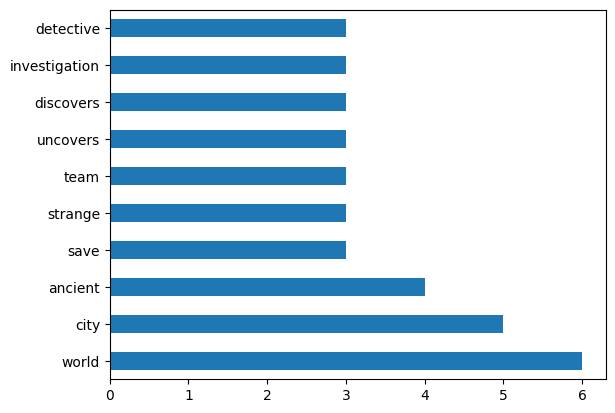

In [44]:
top_10.plot(kind='barh')